In [162]:
#survivorship bias
import yfinance as yf
import pandas as pd
import numpy as np

start = '2015-01-01'
tickers_data = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]


stocks = tickers_data['Symbol'].to_list()
# tickers_data
# tickers_name = pd.read_html('https://www.bankier.pl/inwestowanie/profile/quote.html?symbol=SWIG80')
# tickers = tickers_name[1].Ticker.to_list()
# stocks = [ticker + '.WA' for ticker in tickers]
# df = yf.download(tickers = tickers, start = '2006-12-31')['Close']

df = yf.download(stocks,start=start, interval='1mo')['Close']
df.index = pd.to_datetime(df.index)


[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
- BRK.B: No timezone found, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted


In [ ]:
df

In [52]:
tickers_data = tickers_data[tickers_data['Date added'] >= start]

In [53]:
tickers_data = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

In [54]:
removed = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[1][['Date', 'Removed']]
removed

Date Removed                          
                   Date  Ticker                  Security
0      October 18, 2023     OGN             Organon & Co.
1      October 18, 2023    ATVI       Activision Blizzard
2       October 3, 2023     DXC            DXC Technology
3       October 2, 2023     NaN                       NaN
4    September 18, 2023     LNC     Lincoln National Corp
..                  ...     ...                       ...
329        June 9, 1999     HPH  Harnischfeger Industries
330   December 11, 1998     LDW                     Amoco
331   December 11, 1998     GRN                General Re
332   December 11, 1998     SUN                SunAmerica
333       June 17, 1997     USL                    USLife

[334 rows x 3 columns]

In [55]:
removed = removed.set_index(removed.Date.Date)
removed.index = pd.to_datetime(removed.index)
removed = removed[removed.index >= start]
removed = removed.Removed.dropna()
stocks.extend(removed['Ticker'].to_list())

In [56]:
df = yf.download(stocks,start=start)['Close']





[*********************100%***********************]  689 of 689 completed

83 Failed downloads:
- AVP: No timezone found, symbol may be delisted
- TSS: No timezone found, symbol may be delisted
- LM: No timezone found, symbol may be delisted
- TE: No data found for this date range, symbol may be delisted
- FDO: No data found for this date range, symbol may be delisted
- BRK.B: No timezone found, symbol may be delisted
- CMCSK: No data found for this date range, symbol may be delisted
- BXLT: No data found for this date range, symbol may be delisted
- DWDP: No timezone found, symbol may be delisted
- SPLS: No data found for this date range, symbol may be delisted
- FBHS: No timezone found, symbol may be delisted
- TWC: No data found for this date range, symbol may be delisted
- WCG: No timezone found, symbol may be delisted
- XEC: No timezone found, symbol may be delisted
- MON: No timezone found, symbol may be delisted
- CTXS: No timezone found, symbol may be delisted
- YHOO: No timezon

In [57]:
df.index = pd.to_datetime(df.index)

tickers_data = tickers_data[tickers_data['Date added'] >= start]
tickers_data = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
removed = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[1][['Date', 'Removed']]
removed = removed.set_index(removed.Date.Date)
removed.index = pd.to_datetime(removed.index)
removed = removed[removed.index >= start]
removed = removed.Removed.dropna()
stocks.extend(removed['Ticker'].to_list())
df = yf.download(stocks,start=start)['Adj Close']
df.index = pd.to_datetime(df.index)


In [32]:
df['AAPL'].index[0]

Timestamp('2015-01-02 00:00:00')

In [35]:
removed[removed.Ticker == 'SBNY'].index[0]

Timestamp('2023-03-15 00:00:00')

In [36]:
df['SBNY']
#już został usunięty a dalej są notowania w liście pobrane

Date
2015-01-02    125.250000
2015-01-05    121.809998
2015-01-06    120.360001
2015-01-07    120.970001
2015-01-08    124.080002
                 ...    
2023-11-01      0.005000
2023-11-02      0.016000
2023-11-03      0.015000
2023-11-06      0.020000
2023-11-07      0.005600
Name: SBNY, Length: 2228, dtype: float64

In [37]:
df['SBNY'].index <= removed[removed.Ticker == 'SBNY'].index[0]
#filter the dates before the removal date

array([ True,  True,  True, ..., False, False, False])

In [40]:
df['SBNY'] = df['SBNY'][df['SBNY'].index <= removed[removed.Ticker == 'SBNY'].index[0]]

In [41]:
df['SBNY']

Date
2015-01-02    125.250000
2015-01-05    121.809998
2015-01-06    120.360001
2015-01-07    120.970001
2015-01-08    124.080002
                 ...    
2023-11-01           NaN
2023-11-02           NaN
2023-11-03           NaN
2023-11-06           NaN
2023-11-07           NaN
Name: SBNY, Length: 2228, dtype: float64

In [42]:
tickers_data

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [58]:
def pricefilter_rem(ticker):
    df[ticker] = df[ticker][df[ticker].index <= removed[removed.Ticker == ticker].index[0]]

def pricefilter_add(ticker):
    df[ticker] = df[ticker][df[ticker].index >= tickers_data[tickers_data.Symbol == ticker]['Date added'].values[0]]




In [49]:
tickers_data[tickers_data.Symbol == 'AAPL']['Date added'].values[0]

'1982-11-30'

In [59]:
for removed_ticker in removed.Ticker:
    pricefilter_rem(removed_ticker)
for tickers_added in tickers_data.Symbol:
    pricefilter_add(tickers_added)



TypeError: Invalid comparison between dtype=datetime64[ns] and float

In [19]:
#survivorship bias
import yfinance as yf
import pandas as pd
import numpy as np

start = '2010-01-01'
#overall to u mnie tickers_data
tickers_data = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

stocks = tickers_data['Symbol'].to_list()
tickers_data = tickers_data[tickers_data['Date added'] >= start]

removed = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[1][['Date', 'Removed']]

removed = removed.set_index(removed['Date'])
removed.index = pd.to_datetime(removed.index)
removed = removed[removed.index >= start]
removed = removed.Removed.dropna()
stocks.extend(removed['Ticker'].to_list())

df = yf.download(stocks,start=start)['Close']
df.index = pd.to_datetime(df.index)


def pricefilter_rem(ticker):
    df[ticker] = df[ticker][df[ticker].index <= removed[removed.Ticker == ticker].index[0]]

def pricefilter_add(ticker):
    df[ticker] = df[ticker][df[ticker].index >= tickers_data[tickers_data.Symbol == ticker]['Date added'].values[0]]

for removed_ticker in removed.Ticker:
    pricefilter_rem(removed_ticker)
for tickers_added in tickers_data.Symbol:
    pricefilter_add(tickers_added)

TypeError: The parameter "keys" may be a column key, one-dimensional array, or a list containing only valid column keys and one-dimensional arrays.. Received column of type <class 'pandas.core.frame.DataFrame'>

In [2]:
#na interwale 1mo
#survivorship bias
import yfinance as yf
import pandas as pd
import numpy as np

start = '2010-01-01'
#overall to u mnie tickers_data
tickers_data = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

stocks = tickers_data['Symbol'].to_list()
tickers_data = tickers_data[tickers_data['Date added'] >= start]

removed = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[1][['Date', 'Removed']]
removed = removed.set_index(removed.Date.Date)
removed.index = pd.to_datetime(removed.index)
removed = removed[removed.index >= start]
removed = removed.Removed.dropna()
stocks.extend(removed['Ticker'].to_list())
stocks = [ticker.replace('.', '-') for ticker in stocks]


df = yf.download(stocks,start=start, interval='1mo')['Close']
df.index = pd.to_datetime(df.index)


def pricefilter_rem(ticker):
    df[ticker] = df[ticker][df[ticker].index <= removed[removed.Ticker == ticker].index[0]]

def pricefilter_add(ticker):
    df[ticker] = df[ticker][df[ticker].index >= tickers_data[tickers_data.Symbol == ticker]['Date added'].values[0]]

for removed_ticker in removed.Ticker:
    pricefilter_rem(removed_ticker)
for tickers_added in tickers_data.Symbol:
    pricefilter_add(tickers_added)

[*********************100%***********************]  763 of 763 completed

135 Failed downloads:
- LO: No data found for this date range, symbol may be delisted
- BMC: No data found for this date range, symbol may be delisted
- PGN: No data found for this date range, symbol may be delisted
- MWW: No data found for this date range, symbol may be delisted
- RDC: No timezone found, symbol may be delisted
- XEC: No timezone found, symbol may be delisted
- GAS: No data found for this date range, symbol may be delisted
- GGP: No data found for this date range, symbol may be delisted
- WFM: No data found for this date range, symbol may be delisted
- DWDP: No timezone found, symbol may be delisted
- CBE: No data found for this date range, symbol may be delisted
- SNDK: No data found for this date range, symbol may be delisted
- ACE: No data found for this date range, symbol may be delisted
- KG: No data found for this date range, symbol may be delisted
- ARG: No data found for this date range, 

KeyError: 'BRK.B'

In [3]:
removed

,Ticker,Security
Date,,
2023-10-18,OGN,Organon & Co.
2023-10-18,ATVI,Activision Blizzard
2023-10-03,DXC,DXC Technology
2023-09-18,LNC,Lincoln National Corp
2023-09-18,NWL,Newell Brands Inc
...,...,...
2010-07-14,MIL,Millipore
2010-06-30,STR,Questar
2010-06-28,XTO,XTO Energy


In [9]:
import yfinance as yf
import pandas as pd

class StockData:
    def __init__(self, start_date):
        self.start = start_date
        self.tickers = []
        self.df = pd.DataFrame()
        self.us500_table = None
        self.removed_tickers = None

    def _fetch_tickers(self):
        us500_table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
        self.tickers = us500_table['Symbol'].to_list()
        self.us500_table = us500_table[us500_table['Date added'] >= self.start]

    def _fetch_removed_tickers(self):
        removed_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[1][['Date', 'Removed']]
        removed_tickers.columns = removed_tickers.columns.get_level_values(1)
        self.removed_tickers = removed_tickers[['Date', 'Ticker']]
        self.removed_tickers.set_index('Date', inplace=True)
        self.removed_tickers.index = pd.to_datetime(self.removed_tickers.index)
        self.removed_tickers = self.removed_tickers[self.removed_tickers.index >= self.start].dropna()

    def _combine_tickers(self):
        self.tickers.extend(self.removed_tickers.Ticker.tolist())

    def _download_data(self):
        self.df = yf.download(self.tickers, start=self.start, interval='1mo')['Close']
        self.df.index = pd.to_datetime(self.df.index)

    def _pricefilter_rem(self, ticker):
        if ticker in self.df.columns:
            self.df[ticker] = self.df[ticker][self.df[ticker].index <= self.removed_tickers[self.removed_tickers.Ticker == ticker].index[0]]

    def _pricefilter_add(self, ticker):
        if ticker in self.df.columns:
            self.df[ticker] = self.df[ticker][self.df[ticker].index >= self.us500_table[self.us500_table.Symbol == ticker]['Date added'].values[0]]

    def _apply_filters(self):
        for removed_ticker in self.removed_tickers['Ticker']:
            self._pricefilter_rem(removed_ticker)
        for ticker_added in self.us500_table['Symbol']:
            self._pricefilter_add(ticker_added)

    def get_data(self):
        if self.df.empty:
            self._fetch_tickers()
            self._fetch_removed_tickers()
            self._combine_tickers()
            self._download_data()
            self._apply_filters()
        
        return self.df

# Usage:
stock_data = StockData('2010-01-01')
df = stock_data.get_data()


[*********************100%***********************]  763 of 763 completed

137 Failed downloads:
- LO: No data found for this date range, symbol may be delisted
- BMC: No data found for this date range, symbol may be delisted
- BCR: No data found for this date range, symbol may be delisted
- MWW: No data found for this date range, symbol may be delisted
- MEE: No data found for this date range, symbol may be delisted
- RDC: No timezone found, symbol may be delisted
- XEC: No timezone found, symbol may be delisted
- GAS: No data found for this date range, symbol may be delisted
- GGP: No data found for this date range, symbol may be delisted
- WFM: No data found for this date range, symbol may be delisted
- DWDP: No timezone found, symbol may be delisted
- CBE: No data found for this date range, symbol may be delisted
- SNDK: No data found for this date range, symbol may be delisted
- KG: No data found for this date range, symbol may be delisted
- ACE: No data found for this date range, 

In [64]:
mtl_ret = (ret_df + 1).resample('M').prod()
mtl_ret

,A,AA,AAL,AAP,AAPL,ABBV,ABMD,ABNB,ABT,ACE,...,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-31,0.931213,0.985516,1.000000,1.002775,1.071618,0.915920,1.386760,1.000000,0.996882,1.0,...,0.941721,0.963412,0.957818,0.895483,1.0,0.999032,0.995648,1.000000,0.846942,0.986608
2015-02-28,1.117554,0.945048,1.000000,0.974402,1.096449,1.002486,1.174913,1.000000,1.058311,1.0,...,1.012812,1.059564,1.036447,1.046921,1.0,1.122164,1.073952,1.000000,1.116027,1.078633
2015-03-31,0.984364,0.873563,0.970221,0.966178,0.968628,0.967603,1.177496,1.000000,0.978045,1.0,...,0.960018,0.960008,0.941392,0.980952,1.0,0.970534,0.976161,1.000000,1.009723,1.004339
2015-04-30,0.995668,1.038700,0.914930,0.955308,1.005786,1.104544,0.883208,1.000000,1.001943,1.0,...,1.027882,1.002162,0.894942,1.057110,1.0,1.091972,0.934649,1.000000,1.049630,0.959602
2015-05-31,0.995649,0.931446,0.877407,1.071469,1.040991,1.029848,0.944638,1.000000,1.046963,1.0,...,0.975163,1.020392,0.993044,0.987844,1.0,1.048278,1.038693,1.000000,1.019054,1.120441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-31,1.012640,1.000000,0.933668,1.058179,1.012785,1.110220,1.000000,1.000000,1.021189,1.0,...,0.999907,1.037481,1.000000,1.001154,1.0,0.993648,0.948832,1.041003,1.424051,1.092213
2023-08-31,0.994251,1.000000,0.879403,0.861406,0.956325,0.982484,1.000000,1.000000,0.924279,1.0,...,1.036833,0.893304,1.000000,0.918315,1.0,0.939784,0.862251,0.893006,0.928105,1.012866
2023-09-30,0.923598,1.000000,0.869654,1.000000,0.911322,1.014290,1.000000,0.962539,0.941205,1.0,...,1.057469,0.921003,1.000000,0.879177,1.0,0.965682,0.942075,0.860078,0.982817,0.913233


In [172]:
#na interwale 1mo
mtl_ret = (ret_df + 1).prod()
mtl_ret

A        5.513197
AA       0.947036
AAL      0.243322
AAP      1.744487
AAPL    26.507134
          ...    
YUM      5.102096
ZBH      1.937285
ZBRA     0.870387
ZION     1.797575
ZTS      5.607514
Length: 763, dtype: float64

In [65]:
mtl_12 = mtl_ret.rolling(12).apply(np.prod).dropna()

In [168]:
mtl_12 = mtl_ret.rolling(12).apply(np.prod).dropna()

In [166]:
mtl_12

,A,AA,AAL,AAP,AAPL,ABBV,ABMD,ABNB,ABT,ACE,...,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-08-31,0.895217,0.595088,0.716544,1.105260,1.031373,0.947185,2.570356,1.000000,1.008686,1.0,...,0.810514,1.009243,0.739636,0.852153,1.0,1.102557,0.919797,1.000000,1.025097,1.036019
2015-09-30,0.908922,0.617252,0.713787,1.192013,0.941448,0.901574,1.792810,1.000000,0.898570,1.0,...,0.850492,1.010794,0.738800,0.963343,1.0,1.106115,0.837913,1.000000,1.149416,0.963726
2015-10-31,0.894575,0.603786,0.849632,1.280772,0.930251,0.984298,1.211712,1.000000,0.945746,1.0,...,0.934493,1.147897,0.687912,1.019888,1.0,0.874245,0.868594,1.000000,1.075916,0.933174
2015-11-30,1.006498,0.724458,0.781735,1.087113,0.950735,0.993338,1.139564,1.000000,0.969566,1.0,...,0.960706,1.191983,0.821012,1.065677,1.0,0.921113,0.859513,1.000000,1.109630,1.008857
2015-12-31,1.010636,0.735469,0.876993,1.052517,0.841071,0.916177,1.428029,1.000000,0.967471,1.0,...,0.892183,1.193137,0.924348,0.985954,1.0,0.849814,0.933995,1.000000,0.963303,1.078793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-31,0.785714,1.000000,1.160776,0.492682,1.327096,0.928031,1.008550,1.000000,1.034858,1.0,...,0.963176,1.372108,1.000000,1.003560,1.0,1.070029,1.150291,1.139411,0.738132,1.220254
2023-08-31,0.809021,1.000000,1.158019,0.435829,1.445932,0.909350,1.000000,1.000000,0.937244,1.0,...,1.008069,1.164887,1.000000,0.936420,1.0,1.010150,0.934275,1.072540,0.722132,1.299966
2023-09-30,0.735271,1.000000,0.793680,0.420804,1.186569,1.008866,1.000000,0.962539,0.876074,1.0,...,1.013533,0.927505,1.000000,0.875204,1.0,0.957321,0.881263,0.748087,0.656321,1.051302


In [120]:
top = mtl_12.loc['2023-10-31'].nlargest(5)
top

MPC     1.297170
ANET    1.236394
WRK     1.235982
CEG     1.233424
FANG    1.220463
Name: 2023-10-31 00:00:00, dtype: float64

In [169]:
top = mtl_12.loc['2023-10-31'].nlargest(5)
top

META    3.233898
NVDA    3.021412
PHM     1.840210
AVGO    1.789692
GE      1.788395
Name: 2023-10-31 00:00:00, dtype: float64

In [115]:
top.index.values.tolist()

['NKTR', 'NVDA', 'KLAC', 'TAP', 'ATVI']

In [74]:
mtl_ret[top.name:][1:2] #następny miesiąc

,A,AA,AAL,AAP,AAPL,ABBV,ABMD,ABNB,ABT,ACE,...,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-31,0.900502,0.738602,0.920661,1.010232,0.924758,0.926739,0.945171,1.0,0.842797,1.0,...,0.998717,0.96779,0.917215,0.984932,1.0,0.990691,0.967541,1.0,0.830769,0.898372


In [75]:
relevant_ret = mtl_ret[top.name:][1:2][top.index]

In [76]:
relevant_ret

,ABMD,NFLX,AMZN,ATVI,AYI
Date,,,,,
2016-01-31,0.945171,0.802938,0.868485,0.899509,0.865825


In [77]:
relevant_ret.mean(axis=1)

Date
2016-01-31    0.876385
Freq: M, dtype: float64

In [82]:
#profit dla następnego miesiąca
def top_performers(date):
    top = mtl_12.loc[date].nlargest(5)
    relevant_ret = mtl_ret[top.name:][1:2][top.index]
    return relevant_ret.mean(axis=1).values[0]

In [83]:
top_performers('2015-12-31')

0.8763854757262127

In [86]:
returns = []

for date in mtl_12.index[:-1]:
    returns.append(top_performers(date))

In [87]:
returns

[0.8763854757262127,
 0.9832905711832769,
 1.0703352863339657,
 0.9735766117556703,
 1.0583740920185012,
 1.0237384726258656,
 1.0985056536366908,
 0.9999976319345734,
 1.037976230260604,
 0.9730309727186075,
 1.0161213309242345,
 1.0184843713055538,
 1.0713537244343485,
 0.9398540679892365,
 1.0630706657019364,
 0.9665088182423147,
 1.1331689017289057,
 0.9704484032994356,
 0.9897126285016151,
 1.0325751782205832,
 1.06882528038826,
 1.1076136160195442,
 1.006157505731307,
 1.0010827264640474,
 1.1243892220554113,
 0.9939755586841754,
 1.0575878778101822,
 0.9526778577289864,
 1.1153470916239228,
 0.9444806388545601,
 0.9671131422557331,
 1.1022210982664198,
 1.006816342270703,
 0.6691776651115933,
 0.9648532955045368,
 0.8117655589147222,
 1.1407542513597844,
 1.0287597312992312,
 1.0600839751078133,
 1.0092887686371317,
 0.9340846971840584,
 1.058756835391009,
 1.0520786540081128,
 1.0315930646191993,
 0.9493135208856638,
 1.0026785800527311,
 1.0428544755855533,
 1.0412339167244007

In [88]:
pd.Series(returns).prod()

3.1245187025310273

<Axes: xlabel='Date'>

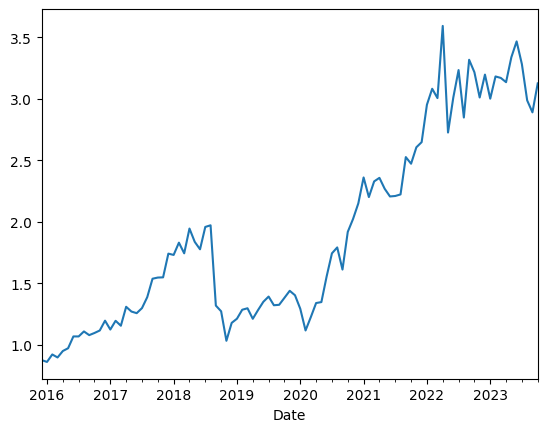

In [91]:
pd.Series(returns, index=mtl_12.index[:-1]).cumprod().plot()

In [92]:
sp500 = yf.download('^GSPC', start=start).Close


[*********************100%***********************]  1 of 1 completed


In [94]:
sp500[-1] / sp500[0]

2.1284083399730047

[*********************100%***********************]  1 of 1 completed


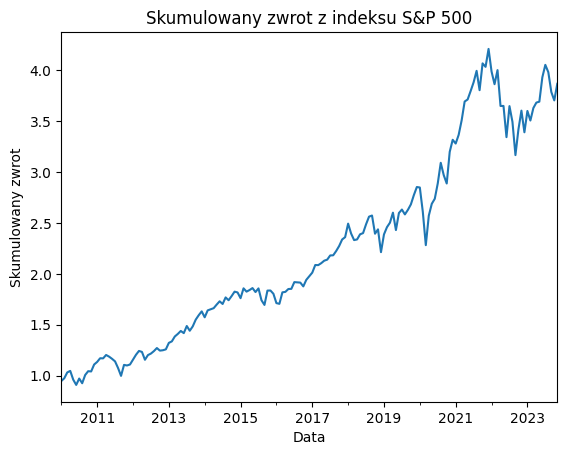

In [135]:
import matplotlib.pyplot as plt
sp500 = yf.download('^GSPC', start=start).Close
sp500_ret = sp500.pct_change()
sp500_cum_ret = (1 + sp500_ret).cumprod() 
sp500_cum_ret_res = sp500_cum_ret.resample('M').last()
sp500_cum_ret_res.plot(title='Skumulowany zwrot z indeksu S&P 500')
plt.xlabel('Data')
plt.ylabel('Skumulowany zwrot')
plt.show()

In [173]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Ustalanie startowej daty
start = '2015-01-01'

# Pobieranie listy spółek wchodzących w skład S&P 500
tickers_data = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
stocks = tickers_data['Symbol'].to_list()

# Pobieranie danych o cenach zamknięcia w interwale miesięcznym
df = yf.download(stocks, start=start, interval='1mo')['Close']

# Upewniamy się, że indeks to datetime
df.index = pd.to_datetime(df.index, format='%Y-%m-%d')

# Obliczanie zwrotu procentowego
ret_df = df.pct_change()

# Dla danych miesięcznych nie trzeba używać resample, ponieważ już mamy dane miesięczne
monthly_returns = ret_df

# Rolling returns dla ostatnich 12 miesięcy (biorąc pod uwagę, że używamy już danych miesięcznych)
rolling_12 = monthly_returns.rolling(window=12).apply(np.prod, raw=True).dropna()

# Funkcje pomocnicze
def top_performers(date):
    try:
        top = rolling_12.loc[date].nlargest(5)
        relevant_returns = monthly_returns.loc[top.name:][1:2][top.index]
        return relevant_returns.mean(axis=1).values[0]
    except KeyError:
        print(f"No data available for {date}")
        return None

def top_tickers():
    try:
        top = rolling_12.iloc[-2].nlargest(5)
        return top.index.values.tolist()
    except IndexError:
        print("Not enough data to determine top tickers.")
        return []

# Symulacja inwestycji
returns = []
for date in rolling_12.index[:-1]:
    performance = top_performers(date)
    if performance is not None:
        returns.append(performance)

# Skumulowany zwrot
cumulative_returns = pd.Series(returns, index=rolling_12.index[:-1]).cumprod()

# Rysowanie wykresu
cumulative_returns.plot(title='Skumulowany zwrot z top performers')
plt.xlabel('Data')
plt.ylabel('Skumulowany zwrot')
plt.show()

[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
- BRK.B: No timezone found, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted


TypeError: no numeric data to plot

<Axes: xlabel='Date'>

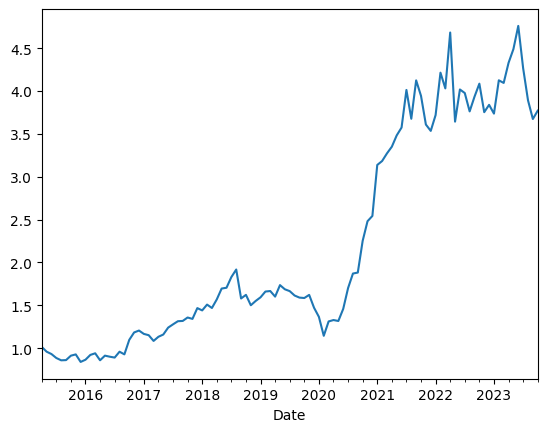

In [118]:
ret_df = df.pct_change()
mtl_ret = (ret_df + 1).resample('M').prod()
mtl_12 = mtl_ret.rolling(4).apply(np.prod).dropna()
relevant_ret = mtl_ret[top.name:][1:2][top.index]

#profit dla następnego miesiąca
def top_performers(date):
    top = mtl_12.loc[date].nlargest(5)
    relevant_ret = mtl_ret[top.name:][1:2][top.index]
    return relevant_ret.mean(axis=1).values[0]

def top_tickers():
    top = mtl_12.iloc[-2].nlargest(5)
    return top.index.values.tolist()

returns = []

for date in mtl_12.index[:-1]:
    returns.append(top_performers(date))

pd.Series(returns, index=mtl_12.index[:-1]).cumprod().plot()

In [119]:
top_tickers()

['MPC', 'ANET', 'WRK', 'CEG', 'FANG']

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brute

class InvestmentAnalyzer:
    def __init__(self, df, window=12, top_n=5):
        self.df = df
        self.window = window
        self.top_n = top_n
        self.monthly_returns = self.calculate_monthly_returns()
        self.rolling_returns = self.calculate_rolling_returns()

    def calculate_monthly_returns(self):
        ret_df = self.df.pct_change()
        monthly_returns = (ret_df + 1).resample('M').prod()
        return monthly_returns

    def calculate_rolling_returns(self):
        rolling_returns = (self.monthly_returns ).rolling(self.window).apply(np.prod, raw=True) 
        return rolling_returns.dropna()

    def get_top_performers(self, date):
        try:
            top = self.rolling_returns.loc[date].nlargest(self.top_n)
            relevant_returns = self.monthly_returns[top.name:][1:2][top.index]
            return relevant_returns.mean(axis=1).values[0]
        except KeyError:
            print(f"No data available for {date}")
            return None

    def get_top_tickers(self):
        top = self.rolling_returns.iloc[-2].nlargest(self.top_n)
        return top.index.values.tolist()

    def simulate_investment(self):
        returns = []
        for date in self.rolling_returns.index[:-1]:
            performance = self.get_top_performers(date)
            if performance is not None:
                returns.append(performance)
        cumulative_returns = pd.Series(returns, index=self.rolling_returns.index[:-1]).cumprod()
        return cumulative_returns

    def plot_cumulative_returns(self, cumulative_returns):
        cumulative_returns.plot(title='Skumulowany zwrot z top performers')
        plt.xlabel('Data')
        plt.ylabel('Skumulowany zwrot')
        plt.show()
    
    def evaluate_performance(self, params):
        window, n_largest = int(params[0]), int(params[1])

        if window < 1 or n_largest < 1:
            return np.inf

        self.window = window
        self.top_n = n_largest
        try:
            self.rolling_returns = self.calculate_rolling_returns()
            performance = self.simulate_investment().iloc[-1]
            # Zwracamy negatywną wartość, ponieważ 'brute' szuka minimum funkcji
            return -performance
        except Exception as e:
            print(e)
            return np.inf

    def optimize_parameters(self, window_range, n_largest_range):
        """
        Optymalizuje wartości 'window' i 'n_largest' dla maksymalizacji łącznego zwrotu.
        """
        ranges = (window_range, n_largest_range)  # Zakresy do optymalizacji
        result = brute(
            self.evaluate_performance,
            ranges=ranges,
            full_output=True,
            finish=None  # Możemy wyłączyć dodatkową optymalizację po brute force
        )
        return result[0]  # Najlepsze znalezione 'window' i 'n_largest'

# Przykładowe użycie:

# analyzer = InvestmentAnalyzer(df, window=4, top_n=5)
# cumulative_returns = analyzer.simulate_investment()
# analyzer.plot_cumulative_returns(cumulative_returns)

# Przykładowe użycie:
analyzer = InvestmentAnalyzer(df)
optimal_params = analyzer.optimize_parameters(window_range=(1, 14), n_largest_range=(6, 10))
print(f"Optimal parameters - Rolling window: {int(optimal_params[0])}, Top N: {int(optimal_params[1])}")

Optimal parameters - Rolling window: 6, Top N: 6


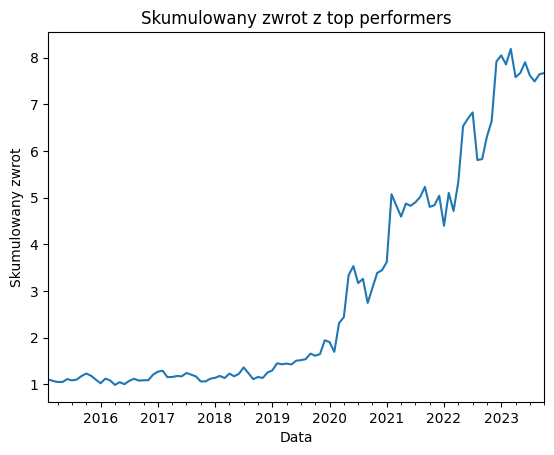

In [160]:
analyzer = InvestmentAnalyzer(df, window=2, top_n=6) #dla us500 8 i 6
cumulative_returns = analyzer.simulate_investment()
analyzer.plot_cumulative_returns(cumulative_returns)

In [161]:
analyzer.get_top_tickers()

['TOR.WA', 'KGN.WA', 'OTS.WA', 'SEL.WA', 'MRB.WA', 'SNK.WA']

In [142]:
analyzer = InvestmentAnalyzer(df, window=8, top_n=6)
cumulative_returns = analyzer.simulate_investment()
analyzer.plot_cumulative_returns(cumulative_returns)

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [147]:
df

,06N,11B,1AT,3RG,AAT,ABE,ABS,ACG,ACP,ACT,...,WWL,WXF,XPL,XTB,XTP,ZEP,ZMT,ZRE,ZUE,ZUK
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,40.369999,13.0399,NaN,NaN,14.471918,NaN,...,1023.000000,3.120,0.9000,NaN,3.00,NaN,2.60,1.48,7.21,9.9
2015-01-05,NaN,NaN,NaN,NaN,40.830002,12.7800,NaN,NaN,14.405095,NaN,...,1006.049988,3.120,0.9100,NaN,2.80,NaN,2.75,1.52,6.95,9.9
2015-01-06,NaN,NaN,NaN,NaN,41.150002,12.9232,NaN,NaN,14.300088,NaN,...,1006.049988,14.664,0.9100,NaN,2.90,NaN,2.75,1.52,6.95,9.9
2015-01-07,NaN,NaN,NaN,NaN,41.930000,13.1312,NaN,NaN,14.424188,NaN,...,1000.000000,3.260,0.9000,NaN,2.91,NaN,2.80,1.58,6.65,11.0
2015-01-08,NaN,NaN,NaN,NaN,42.180000,13.1001,NaN,NaN,14.548287,NaN,...,996.549988,3.530,0.9000,NaN,2.91,NaN,2.95,1.62,6.60,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-01,NaN,NaN,NaN,NaN,17.969999,NaN,NaN,NaN,5.890000,27.650000,...,NaN,NaN,0.5100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-02,NaN,NaN,NaN,NaN,19.049999,NaN,NaN,NaN,6.100000,27.889999,...,NaN,NaN,0.5200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-03,NaN,NaN,NaN,NaN,19.950001,NaN,NaN,NaN,6.180000,28.230000,...,NaN,NaN,0.5300,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
import pandas as pd

class MarketData:
    def __init__(self, start_date):
        self.start_date = start_date
        self.tickers_data = self._fetch_tickers_data()
        self.removed_stocks = self._fetch_removed_stocks()
        self.stocks = self._compile_stocks_list()
        self.data = self._download_data()
        self._apply_filters()

    def _fetch_tickers_data(self):
        return pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

    def _fetch_removed_stocks(self):
        removed = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[1][['Date', 'Removed']]
        removed.set_index(pd.to_datetime(removed['Date']), inplace=True)
        return removed[removed.index >= self.start_date]['Removed']

    def _compile_stocks_list(self):
        stocks = self.tickers_data[self.tickers_data['Date added'] >= self.start_date]['Symbol'].tolist()
        stocks.extend(self.removed_stocks['Ticker'].tolist())
        return stocks

    def _download_data(self):
        data = yf.download(self.stocks, start=self.start_date, interval='1mo')['Close']
        data.index = pd.to_datetime(data.index)
        return data

    def _apply_filters(self):
        for ticker in self.stocks:
            if ticker in self.removed_stocks['Ticker'].values:
                self.data[ticker] = self.data[ticker][self.data[ticker].index <= self.removed_stocks[self.removed_stocks['Ticker'] == ticker].index[0]]
            if ticker in self.tickers_data['Symbol'].values:
                self.data[ticker] = self.data[ticker][self.data[ticker].index >= self.tickers_data[self.tickers_data['Symbol'] == ticker]['Date added'].values[0]]

    def get_data(self):
        return self.data
    
x = MarketData(start_date = '2010-12-31')

ValueError: to assemble mappings requires at least that [year, month, day] be specified: [day,month,year] is missing

In [46]:
import pandas as pd
import yfinance as yf
import requests

def get_company_logo_and_name(ticker):
    api_url = f'https://api.api-ninjas.com/v1/logo?ticker={ticker}'
    response = requests.get(api_url, headers={'X-Api-Key': '+zhgPUvc2xvwDNSZsaZd8A==PrkYMsTwM93rZtrk'})

    if response.status_code == requests.codes.ok:
        data = response.json()
        if data:
            return data[0].get('name'), data[0].get('image')

    # Jeśli nie znaleziono danych w pierwszym API, próbuj z drugim API
    api_url = f'https://api.polygon.io/v3/reference/tickers/{ticker}?apiKey=4bVD25p6Wi6ddaJ1vTkSWySahqvcd9qJ'
    response = requests.get(api_url)
    try:
        data = response.json()
        if data:
            name = data['results'].get('name')
            logo_url = data['results']['branding'].get('logo_url')
            if logo_url:
                logo_url += '?apiKey=4bVD25p6Wi6ddaJ1vTkSWySahqvcd9qJ'
            return name, logo_url
    except KeyError:
        return None, None

# Przykład użycia funkcji
us500_table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
tickers = us500_table['Symbol'].to_list()
tickers_list = []
for ticker in tickers:
    name, image = get_company_logo_and_name(ticker)
    if name is None or image is None:
        tickers_list.append(ticker)

In [47]:
len(tickers_list)

3

In [48]:
tickers_list

['COR', 'EG', 'NWSA']

In [24]:
import pandas as pd    
import yfinance as yf 
import requests

us500_table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
tickers = us500_table['Symbol'].to_list()
tickers = [ticker.replace('.', '-') if '.' in ticker else ticker for ticker in tickers]


# df = yf.download(tickers, interval='1mo')['Close']

def get_company_logo_polygon(ticker):
    api_url = f'https://api.polygon.io/v3/reference/tickers/{ticker}?apiKey=4bVD25p6Wi6ddaJ1vTkSWySahqvcd9qJ'
    response = requests.get(api_url, headers={'X-Api-Key': '+zhgPUvc2xvwDNSZsaZd8A==PrkYMsTwM93rZtrk'})

    print(response)
    # if response.status_code == requests.codes.ok:
    #     data = response.json()
    #     if data:
    #         name = data[0].get('name')
    #         image = data[0].get('image')
    #         return name, image
    #     else:
    #         return None, None
    # else:
    #     return "Error:", response.status_code, response.text

In [ ]:



polygonAPIkey = 'abcdefgabcdefgabcdefg'

In [55]:
def get_company_logo_polygon(ticker):
    api_url = f'https://api.polygon.io/v3/reference/tickers/{ticker}?apiKey=4bVD25p6Wi6ddaJ1vTkSWySahqvcd9qJ'
    response = requests.get(api_url, headers={'X-Api-Key': '+zhgPUvc2xvwDNSZsaZd8A==PrkYMsTwM93rZtrk'})
    data = response.json()

    print(data)
    print(data['results'].get('name'))
    # print(data['results']['branding'].get('logo_url') + '?apiKey=4bVD25p6Wi6ddaJ1vTkSWySahqvcd9qJ')

get_company_logo_polygon('EG')

{'request_id': 'ee78d88dd44ba29a04cfe5951a012fca', 'results': {'ticker': 'EG', 'name': 'Everest Group, Ltd.', 'market': 'stocks', 'locale': 'us', 'primary_exchange': 'XNYS', 'type': 'CS', 'active': True, 'currency_name': 'usd', 'cik': '0001095073', 'market_cap': 17195625031.2, 'phone_number': '(441) 295-0006', 'address': {'address1': 'SEON PLACE, 4TH FLOOR', 'address2': '141 FRONT STREET', 'city': 'HAMILTON', 'state': 'D0', 'postal_code': 'HM 19'}, 'description': 'Everest Group Ltd is engaged in providing insurance services in the U.S., Bermuda, and international markets. It operates in Reinsurance and Insurance business. The Reinsurance operation writes property and casualty reinsurance and specialty lines of business, on both a treaty and facultative basis, through reinsurance brokers, as well as directly with ceding companies. The Insurance operation writes property and casualty insurance directly and through brokers, surplus lines brokers, and general agents within the U.S., Bermud